In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ieeg.auth import Session
from spike_detector import *
from spike_morphology import *
from iEEG_helper_functions import *

In [2]:
RANDOM_IEEG_CLIPS = "../../Data/spikes/random_ieeg_clips/"
with open("dma_ieeglogin.bin", "r") as f:
    session = Session("dma", f.read())

In [4]:
# Iterate through all the files in the directory that ends with pkl
for file in os.listdir(RANDOM_IEEG_CLIPS):
    if file.endswith(".pkl"):
        print(file)
        # Load the file
        ieeg_data = pd.read_pickle(RANDOM_IEEG_CLIPS + file)

        # The file's name has format ieeg_data_HUP154_phaseII_1370.pkl, extract HUP154_phaseII
        hup_id = file.split("_")[2]
        dataset_name = f"{hup_id}_phaseII"
        dataset = session.open_dataset(dataset_name)
        all_channel_labels = np.array(dataset.get_channel_labels())
        channel_labels_to_download = all_channel_labels[
            electrode_selection(all_channel_labels)
        ]
        fs = int(dataset.get_time_series_details(all_channel_labels[0]).sample_rate)
        good_channels_res = detect_bad_channels_optimized(ieeg_data.to_numpy(), fs)
        good_channel_indicies = good_channels_res[0]
        good_channel_labels = channel_labels_to_download[good_channel_indicies]
        ieeg_data = ieeg_data[good_channel_labels].to_numpy()

        # Check if ieeg_data is empty after dropping bad channels
        if ieeg_data.size == 0:
            print("Empty dataframe after dropping bad channels, skip...")

        ieeg_data = common_average_montage(ieeg_data)

        # Apply the filters directly on the DataFrame
        ieeg_data = notch_filter(ieeg_data, 59, 61, fs)
        output = spike_detector(
            data=ieeg_data,
            fs=fs,
            electrode_labels=good_channel_labels,
        )
        print(output)
        # print(f"{len(np.unique(output[:, 2]))} spikes detected")

ieeg_data_HUP174_phaseII_14111.pkl
[]
ieeg_data_HUP154_phaseII_1370.pkl
Returning early to skip multi_channel_requirement
[['13374' '108' 'LJ6']
 ['13376' '33' 'LD11']
 ['13377' '114' 'LK3']
 ...
 ['9362' '127' 'LL8']
 ['9362' '126' 'LL7']
 ['9362' '125' 'LL6']]
ieeg_data_HUP188_phaseII_4061.pkl
Returning early to skip multi_channel_requirement
[['10072' '100' 'LI05']
 ['10072' '99' 'LI04']
 ['10073' '89' 'LH06']
 ...
 ['9716' '129' 'LK10']
 ['9719' '127' 'LK08']
 ['9724' '82' 'LG11']]
ieeg_data_HUP158_phaseII_7827.pkl


KeyboardInterrupt: 

In [3]:
ieeg_data = pd.read_pickle(RANDOM_IEEG_CLIPS + "ieeg_data_HUP154_phaseII_1370.pkl")
hup_id = 154
dataset_name = f"HUP{hup_id}_phaseII"
dataset = session.open_dataset(dataset_name)
all_channel_labels = np.array(dataset.get_channel_labels())
channel_labels_to_download = all_channel_labels[electrode_selection(all_channel_labels)]
fs = int(dataset.get_time_series_details(all_channel_labels[0]).sample_rate)
good_channels_res = detect_bad_channels_optimized(ieeg_data.to_numpy(), fs)
good_channel_indicies = good_channels_res[0]
good_channel_labels = channel_labels_to_download[good_channel_indicies]
ieeg_data = ieeg_data[good_channel_labels].to_numpy()

# Check if ieeg_data is empty after dropping bad channels
if ieeg_data.size == 0:
    print("Empty dataframe after dropping bad channels, skip...")

ieeg_data = common_average_montage(ieeg_data)

# Apply the filters directly on the DataFrame
ieeg_data = notch_filter(ieeg_data, 59, 61, fs)
output = spike_detector(
    data=ieeg_data,
    fs=fs,
    electrode_labels=good_channel_labels,
)

Returning early to skip multi_channel_requirement


In [4]:
output

array([['13374', '108', 'LJ6'],
       ['13376', '33', 'LD11'],
       ['13377', '114', 'LK3'],
       ...,
       ['9362', '125', 'LL6'],
       ['9362', '126', 'LL7'],
       ['9362', '127', 'LL8']], dtype='<U21')

['13374' '108' 'LJ6']
['13376' '33' 'LD11']
['13377' '114' 'LK3']
['13377' '113' 'LK2']
['13377' '112' 'LK1']
['13378' '147' 'RK4']
['13379' '42' 'LD9']
['13379' '157' 'RL7']
['13379' '156' 'RL6']
['13379' '158' 'RL8']
['13380' '99' 'LI8']
['13380' '98' 'LI7']
['13380' '41' 'LD8']
['13380' '71' 'LG2']
['13380' '120' 'LL1']
['13380' '109' 'LJ7']
['13380' '100' 'LI9']
['13380' '107' 'LJ5']
['13380' '72' 'LG3']
['13381' '121' 'LL2']
['13381' '150' 'RK8']
['13381' '105' 'LJ3']
Bad feature


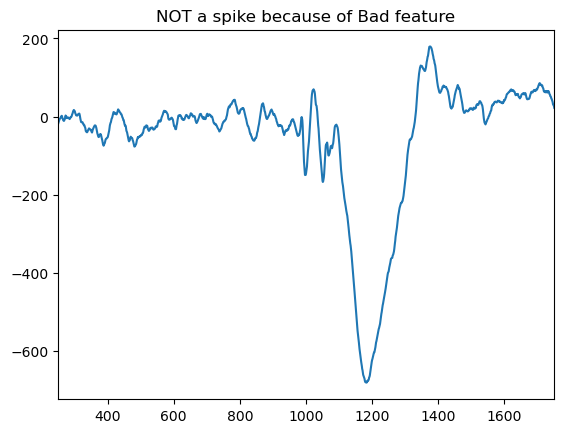

['13381' '67' 'LG1']
['13381' '106' 'LJ4']
['13381' '91' 'LI10']
['13381' '148' 'RK5']
['13381' '96' 'LI5']
['13382' '149' 'RK6']
['13382' '70' 'LG12']
['13382' '126' 'LL7']
['13382' '125' 'LL6']
['13382' '68' 'LG10']
['13382' '127' 'LL8']
['13382' '69' 'LG11']
['13382' '124' 'LL5']
['13382' '78' 'LG9']
['13382' '36' 'LD3']
['13384' '102' 'LJ10']
['13384' '103' 'LJ11']
['13384' '92' 'LI12']
['13384' '54' 'LE9']
['13385' '117' 'LK6']
['13385' '119' 'LK8']
['13385' '118' 'LK7']
['13385' '93' 'LI2']
['13408' '71' 'LG2']
['13410' '67' 'LG1']
['13426' '109' 'LJ7']
['13470' '107' 'LJ5']
['13484' '114' 'LK3']
['13485' '113' 'LK2']
['13488' '112' 'LK1']
['13490' '102' 'LJ10']
['13491' '111' 'LJ9']
['13494' '103' 'LJ11']
['1953' '106' 'LJ4']
['1968' '107' 'LJ5']
['20459' '71' 'LG2']
['20459' '112' 'LK1']
['20460' '113' 'LK2']
['20460' '67' 'LG1']
['20460' '107' 'LJ5']
['20466' '108' 'LJ6']
['20469' '145' 'RK2']
['20512' '114' 'LK3']
['20519' '106' 'LJ4']
['21314' '108' 'LJ6']
['21315' '109' 'LJ

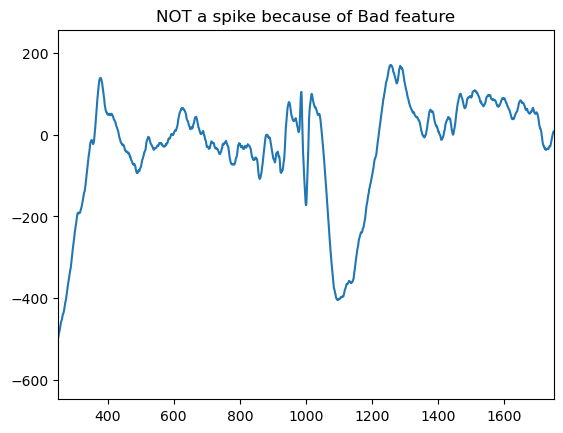

['21396' '62' 'LF5']
['21396' '54' 'LE9']
['21397' '53' 'LE8']
['21397' '59' 'LF2']
['21397' '94' 'LI3']
['21397' '60' 'LF3']
['21398' '34' 'LD12']
['21398' '63' 'LF6']
['21399' '52' 'LE7']
['21399' '108' 'LJ6']
['21405' '24' 'LC3']
['22244' '150' 'RK8']
['22253' '108' 'LJ6']
['22256' '33' 'LD11']
['22257' '115' 'LK4']
['22258' '147' 'RK4']
['22260' '42' 'LD9']
['22260' '32' 'LD10']
['22261' '41' 'LD8']
['22262' '102' 'LJ10']
['22262' '107' 'LJ5']
['22262' '106' 'LJ4']
['22263' '71' 'LG2']
['22263' '37' 'LD4']
['22263' '105' 'LJ3']
['22263' '67' 'LG1']
['22263' '36' 'LD3']
['22263' '72' 'LG3']
['22264' '92' 'LI12']
['22264' '97' 'LI6']
['22264' '103' 'LJ11']
['22265' '101' 'LJ1']
['22265' '62' 'LF5']
['22265' '61' 'LF4']
['22265' '99' 'LI8']
['22265' '98' 'LI7']
['22265' '38' 'LD5']
['22265' '96' 'LI5']
['22265' '95' 'LI4']
['22266' '59' 'LF2']
['22266' '60' 'LF3']
['22266' '94' 'LI3']
['22266' '63' 'LF6']
['22267' '93' 'LI2']
['22267' '35' 'LD2']
['22314' '37' 'LD4']
['22315' '92' 'LI

In [12]:
num_good = 0

for spike in output:
    print(spike)
    channel_index = int(spike[1])
    peak_index = int(spike[0])
    spike_signal = ieeg_data.T[channel_index][peak_index - 1000 : peak_index + 1000]
    # spike_signal = ieeg_data[peak_index - 1000 : peak_index + 1000][
    #     channel_id
    # ].to_numpy()

    basic_features, advanced_features, is_valid, bad_reason = extract_spike_morphology(
        spike_signal
    )

    if is_valid:
        num_good += 1
        peak, left_point, right_point, slow_end, slow_max = basic_features
        print(basic_features)
        print(advanced_features)
        plt.plot(spike_signal)
        plt.plot(peak, spike_signal[peak], "x")
        plt.plot(left_point, spike_signal[left_point], "o")
        plt.plot(right_point, spike_signal[right_point], "o")
        plt.plot(slow_end, spike_signal[slow_end], "o", color="k")
        plt.title("A spike")
        plt.xlim(250, 1750)
        plt.show()
    else:
        print(bad_reason)
        plt.plot(spike_signal)
        plt.title(f"NOT a spike because of {bad_reason}")
        plt.xlim(250, 1750)
        plt.show()
    # elif bad_reason != "Short segment":
    #     print(bad_reason)
    # plt.plot(spike_signal)
    # plt.title(f"NOT a spike because of {bad_reason}")
    # plt.xlim(250, 1750)
    # plt.show()

In [11]:
ieeg_data.shape

(30720, 183)

In [ ]:
# features = [
#     "slow_max",
#     "rise_amp",
#     "decay_amp",
#     "slow_width",
#     "slow_amp",
#     "rise_slope",
#     "decay_slope",
#     "average_amp",
# ]

# for feature in features:
#     fig, axarr = plt.subplots(
#         nrows=(len(all_spikes_dfs) + 1) // 2,
#         ncols=2,
#         figsize=(16, 4 * (len(all_spikes_dfs) + 1) // 2),
#     )
#     fig.suptitle(f"Change in {feature} across hour")

#     for idx, (df, hup_id, fs) in enumerate(
#         zip(all_spikes_dfs, completed_hup_ids, all_fs)
#     ):
#         grouped = df.groupby("peak_hour").mean()
#         row = idx // 2
#         col = idx % 2
#         sns.regplot(
#             x=grouped.index,
#             y=grouped[feature],
#             ax=axarr[row, col],
#             lowess=True,
#             scatter_kws={"s": 10},
#             line_kws={"color": "red"},
#         )
#         axarr[row, col].set_title(f"HUP {hup_id} {fs}Hz")
#         axarr[row, col].set_xlabel("Hour")
#         axarr[row, col].set_ylabel(feature)

#         # Load seizure times and plot vertical lines
#         seizure_times_sec = np.load(os.path.join(SEIZURES_DIR, f"HUP_{hup_id}.npy"))
#         seizure_times_hour = seizure_times_sec[:, 0] / 3600  # convert seconds to hours
#         for seizure_time in seizure_times_hour:
#             axarr[row, col].axvline(x=seizure_time, color="red", linestyle="--")

#     # Delete unused subplots
#     for i in range(len(all_spikes_dfs), 2 * ((len(all_spikes_dfs) + 1) // 2)):
#         row = i // 2
#         col = i % 2
#         fig.delaxes(axarr[row, col])

#     plt.tight_layout()
#     plt.subplots_adjust(top=0.9)
#     plt.show()

In [ ]:
# def get_and_plot_longest_spike_train(test, patient_hup_id, fs, ax):
#     # Group by 'sequence_index_mask' and count rows in each group
#     grouped = test.groupby("sequence_index_mask").size()

#     # Identify the sequence_index_mask with the maximum count
#     longest_spike_train_mask = grouped.idxmax()
#     longest_spike_train_count = grouped.max()

#     print(
#         f"The longest spike train has sequence_index_mask: {longest_spike_train_mask} with {longest_spike_train_count} spikes."
#     )

#     # To get the rows corresponding to the longest spike train:
#     longest_spike_train_df = test[
#         test["sequence_index_mask"] == longest_spike_train_mask
#     ]

#     # Get the smallest peak_index and largest peak_index
#     smallest_peak_index = longest_spike_train_df["peak_index"].min()
#     largest_peak_index = longest_spike_train_df["peak_index"].max()

#     dataset_name = f"HUP{patient_hup_id}_phaseII"
#     dataset = session.open_dataset(dataset_name)
#     all_channel_labels = np.array(dataset.get_channel_labels())

#     ieeg_data, _ = get_iEEG_data(
#         "dma",
#         "dma_ieeglogin.bin",
#         f"HUP{patient_hup_id}_phaseII",
#         (smallest_peak_index - 1000) / fs * 1e6,
#         (largest_peak_index + 1000) / fs * 1e6,
#         all_channel_labels,
#     )

#     print(ieeg_data.shape)
#     for channel in ieeg_data.columns:
#         ax.plot(ieeg_data[channel])

#     ax.set_ylabel("Amplitude")
#     ax.set_xlabel("Time")
#     ax.set_title(f"HUP {hup_id}")

#     return ieeg_data

# # Creating a subplot figure
# n_patients = len(all_spikes_dfs)


# # Looping over the dataframes
# for all_spikes_df, fs, hup_id in zip(all_spikes_dfs, all_fs, completed_hup_ids):
#     print(f"Processing HUP {hup_id}...")

#     # Check for sequence change based on sequence_index or inter_spike_interval_samples
#     change_mask = all_spikes_df["inter_spike_interval_samples"] > 55

#     # Create the sequence_index_mask
#     all_spikes_df["sequence_index_mask"] = change_mask.astype(int).cumsum()

#     # Load seizure times and plot vertical lines
#     seizure_times_sec = np.load(os.path.join(SEIZURES_DIR, f"HUP_{hup_id}.npy"))
#     seizure_times_hour = seizure_times_sec[:, 0] / 3600  # convert seconds to hours

#     fig, axs = plt.subplots(1, 3, figsize=(15, 6))  # 1 row, 3 columns for each patient

#     # Extracting Fano Factors for the three scenarios:
#     # 1. Max medication
#     max_medication_data = all_spikes_df[all_spikes_df["peak_hour"].isin([0, 1, 2])]
#     get_and_plot_longest_spike_train(max_medication_data, hup_id, fs, axs[0])
#     axs[0].set_title(f"HUP {hup_id} - Max Medication")

#     # 2. Before seizure
#     first_seizure_hour = int(seizure_times_hour[0])
#     before_seizure_data = all_spikes_df[
#         all_spikes_df["peak_hour"].isin(
#             range(first_seizure_hour - 2, first_seizure_hour + 1)
#         )
#     ]
#     get_and_plot_longest_spike_train(before_seizure_data, hup_id, fs, axs[1])
#     axs[1].set_title(f"HUP {hup_id} - Before Seizure")

#     # 3. After seizure
#     last_hours = sorted(all_spikes_df["peak_hour"].unique())[-6:-3]
#     after_seizure_data = all_spikes_df[all_spikes_df["peak_hour"].isin(last_hours)]
#     get_and_plot_longest_spike_train(after_seizure_data, hup_id, fs, axs[2])
#     axs[2].set_title(f"HUP {hup_id} - After Seizure")

#     fig.suptitle(f"HUP {hup_id}")
#     plt.tight_layout()
#     plt.show()  # Displays the figure